<a href="https://colab.research.google.com/github/Potdooshami/2H_TaSe2_Tc_STM/blob/main/spatial_lockinTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
L = 5
R = .5
N = 1024

In [22]:
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'r (nm)')

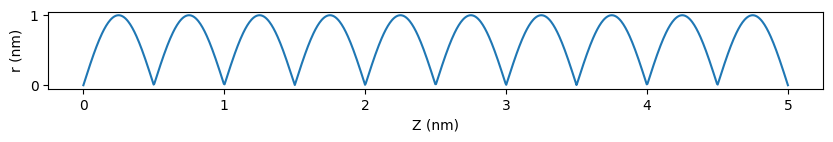

In [30]:
pi = np.pi
xrng = np.linspace(0, L, N)
yrng = abs(np.sin(2*pi*xrng))
plt.figure(figsize=(10, 1)) # 가로 10인치, 세로 4인치로 설
plt.plot(xrng,yrng)
plt.xlabel('Z (nm)')
plt.ylabel('r (nm)')